In [1]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import spacy
from collections import Counter
from functools import reduce

#Učitavanje podataka i inicijaliziranje NLP 
nlp = spacy.load("en_core_web_sm")
plt.figure(figsize=(8,4)) # this creates a figure 8 inch wide, 4 inch high
file = './train.csv'
data = pd.read_csv(file)

<Figure size 576x288 with 0 Axes>

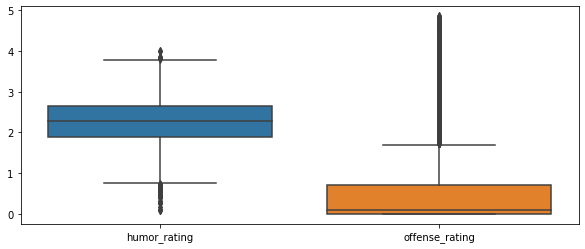

In [2]:
#plot humora i uvrijede
boxplots = data[["humor_rating", "offense_rating"]]
plt.figure(figsize=(10,4)) # this creates a figure 8 inch wide, 4 inch high
sns.boxplot(data = boxplots)

In [3]:
data[data["is_humor"] == 1].describe()

id  is_humor  humor_rating  humor_controversy  offense_rating
count  4932.000000    4932.0   4932.000000        4932.000000     4932.000000
mean   3995.640105       1.0      2.260525           0.499797        0.898723
std    2305.405793       0.0      0.566974           0.500051        1.129249
min       1.000000       1.0      0.100000           0.000000        0.000000
25%    2010.750000       1.0      1.890000           0.000000        0.000000
50%    3995.000000       1.0      2.280000           0.000000        0.350000
75%    5995.250000       1.0      2.650000           1.000000        1.450000
max    7999.000000       1.0      4.000000           1.000000        4.850000

In [4]:
data[data["is_humor"] == 0].describe()

id  is_humor  humor_rating  humor_controversy  offense_rating
count  3068.000000    3068.0           0.0                0.0     3068.000000
mean   4008.312581       0.0           NaN                NaN        0.081519
std    2316.539440       0.0           NaN                NaN        0.206183
min       6.000000       0.0           NaN                NaN        0.000000
25%    1972.750000       0.0           NaN                NaN        0.000000
50%    4011.500000       0.0           NaN                NaN        0.000000
75%    6010.500000       0.0           NaN                NaN        0.100000
max    8000.000000       0.0           NaN                NaN        3.650000

Text(0, 0.5, 'funniness')

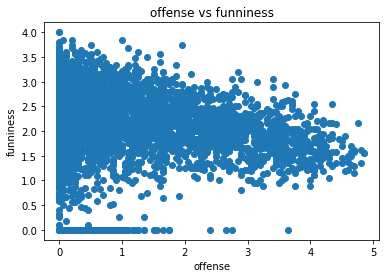

In [5]:
#scatterplot ratinga uvrede vs ratinga humora. Zanimljiv oblik
offensive = data["offense_rating"].fillna(0)
funny = data["humor_rating"].fillna(0)
plt.scatter(offensive,funny)
plt.title("offense vs funniness")
plt.xlabel("offense")
plt.ylabel("funniness")

In [6]:
#funkcija koja pretvara dataframe object u Counter object koji sadrži informaciju o pojavljivanju pojedinih riječi unutar tog
#dataframea
def df_to_counter(df):
    #tokeniziranje
    tokenized = df['text'].apply(lambda x: nlp.make_doc(x))
    
    #tokenizirane riječi uklanjamo ako su stop word ili punctuation
    words = tokenized.apply(lambda x: [token.lemma_ for token in x if token.is_stop == False and token.is_punct == False])
    
    #dobili smo dataframe puno lista. Sve to stavljamo u jednu listu sa svim riječima
    words_list = sum(words.tolist(), [])
    
    #stavljamo sve te riječi u listi uu lowercase
    words_list = [item.lower() for item in words_list]
    
    #inicijaliziramo brojač
    counter = Counter(words_list)
    return counter 

In [7]:
#stvaranje counta riječi za dataset koji sadrži sve textove, smiješne tekstove, kontroverzne tekstove i nesmiješne tekstove

df_to_counter(data)

funny_data = data[data["is_humor"] == 1]
funny_count = df_to_counter(funny_data)

controversial_data = data[data["humor_controversy"] == 1]
controversial_count = df_to_counter(controversial_data)

unfunny_data = data[data["is_humor"] == 0]
unfunny_count = df_to_counter(unfunny_data)

In [8]:
#razlika između smiješnih i nesmiješnih tekstova
delta = funny_count - unfunny_count
delta.most_common()

[('wife', 474),
 ('say', 465),
 ('like', 307),
 ('tell', 266),
 ('get', 225),
 ('ask', 215),
 ('girlfriend', 181),
 ('man', 161),
 ('guy', 154),
 ('go', 135),
 ('fat', 121),
 ('think', 118),
 ('fuck', 116),
 ('woman', 106),
 ('doctor', 102),
 ('hear', 98),
 ('walk', 97),
 ('difference', 95),
 ('eat', 95),
 ('look', 94),
 ('dad', 91),
 ('see', 89),
 ('kid', 88),
 ('reply', 87),
 ('know', 86),
 ('girl', 81),
 ('lady', 79),
 ('people', 77),
 ('call', 76),
 ('friend', 76),
 ('drink', 75),
 ('house', 73),
 ('joke', 73),
 ('leave', 71),
 ('car', 71),
 ('baby', 70),
 ('bar', 69),
 ('white', 68),
 ('night', 68),
 ('mexican', 68),
 ('year', 65),
 ('son', 65),
 ('sex', 64),
 ('give', 63),
 ('oh', 62),
 ('buy', 62),
 ('good', 61),
 ('hand', 61),
 ('wear', 60),
 ('muslim', 59),
 ('door', 58),
 ('dog', 58),
 ('run', 57),
 ('gay', 56),
 ('bed', 56),
 ('home', 54),
 ('have', 54),
 ('turn', 52),
 ('die', 52),
 ('start', 51),
 ('blind', 51),
 ('want', 50),
 ('2', 50),
 ('shit', 49),
 ('chinese', 48),
 

In [9]:
#razlika između nesmiješnih i smiješnih tekstova
delta_reversed = unfunny_count - funny_count
delta_reversed.most_common()

[('health', 143),
 ('love', 142),
 ('help', 106),
 ('life', 87),
 ('mental', 81),
 ('skin', 64),
 ('vitamin', 64),
 ('world', 63),
 ('tea', 55),
 ('community', 53),
 ('heart', 52),
 ('trans', 51),
 ('relationship', 50),
 ('tweet', 48),
 ('matt', 45),
 ('thing', 42),
 ('auntie', 42),
 ('human', 42),
 ('episode', 42),
 ('learn', 40),
 ('accord', 39),
 ('live', 38),
 ('contain', 38),
 ('red', 37),
 ('increase', 35),
 ('happy', 34),
 ('important', 33),
 ('truth', 32),
 ('experience', 32),
 ('begin', 31),
 ('matter', 30),
 ('cause', 29),
 ('dr.', 29),
 ('share', 27),
 ('well', 27),
 ('feel', 27),
 ('reduce', 27),
 ('strong', 27),
 ('brain', 25),
 ('$', 25),
 ('improve', 25),
 ('loss', 24),
 ('cell', 24),
 ('spn', 24),
 ('mind', 24),
 ('jnf', 24),
 ('depression', 23),
 ('million', 23),
 ('university', 23),
 ('study', 23),
 ('healthy', 22),
 ('worth', 22),
 ('antioxidant', 22),
 ('change', 22),
 ('support', 22),
 ('provide', 22),
 ('swim', 22),
 ('forever', 22),
 ('moment', 22),
 ('folx', 22)

In [10]:
#NAJBITNIJE!!!!!!! POSTOTAK POJAVLJIVANJA POJEDINIH RIJEČI U SMIJEŠNIM TEKSTOVIMA NASPRAM SVIH TEKSTOVA
dict_sum = dict(funny_count + unfunny_count)
dict_funny = dict(funny_count)
percentages = dict((k, float(dict_funny[k]) / dict_sum[k]) for k in dict_funny)

percentages = dict(sorted(percentages.items(), key=lambda x: x[1], reverse=True))
percentages = {key:val for key, val in percentages.items() if val != 1.0}

In [11]:
#dalje se može koristiti kako osoba želi. 
percentages

{'lady': 0.9876543209876543,
 'jesus': 0.98,
 'asian': 0.9787234042553191,
 'wife': 0.9778225806451613,
 'cop': 0.9767441860465116,
 'bar': 0.9726027397260274,
 'blonde': 0.9722222222222222,
 'glass': 0.96875,
 'deaf': 0.967741935483871,
 'therapist': 0.9666666666666667,
 'yo': 0.9666666666666667,
 'cross': 0.9629629629629629,
 'shit': 0.9622641509433962,
 'pregnant': 0.9615384615384616,
 'mexican': 0.9594594594594594,
 'shoe': 0.9583333333333334,
 'pant': 0.9583333333333334,
 'reply': 0.9578947368421052,
 'q': 0.9565217391304348,
 'girlfriend': 0.9547738693467337,
 'shirt': 0.9545454545454546,
 'homosexual': 0.9545454545454546,
 'fart': 0.9523809523809523,
 'accidentally': 0.9523809523809523,
 'prostitute': 0.9523809523809523,
 'joke': 0.9506172839506173,
 'bird': 0.95,
 'vegan': 0.95,
 'cow': 0.9473684210526315,
 'shout': 0.9459459459459459,
 'german': 0.9459459459459459,
 'chinese': 0.9444444444444444,
 'sir': 0.9444444444444444,
 'h': 0.9444444444444444,
 'beer': 0.9411764705882353